In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
import nltk,string
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [2]:
all_ico_details = pd.read_excel('/home/ankit/Desktop/Stevens/Semester 3/BIA-660/Project/icobench data/All_ICO_details.xlsx')
print('Number of data points : ', all_ico_details.shape[0])
print('Number of features : ', all_ico_details.shape[1])
print('Features : ', all_ico_details.columns.values)
all_ico_details.head()



Number of data points :  5578
Number of features :  10
Features :  ['Unnamed: 0' 'CoinName' 'About' 'Token' 'Token type' 'Platform' 'Country'
 'wlkyc' 'Restricted Areas' 'Team Members']


,Unnamed: 0,CoinName,About,Token,Token type,Platform,Country,wlkyc,Restricted Areas,Team Members
0,0,BuyAnyLight (BAL) (PreICO),\nAbout BuyAnyLight (BAL)\nBuyAnyLight (BAL) i...,BAL Token,Utility,Ethereum,United Arab Emirates,KYC,"USA, North Korea, Iran",25
1,1,DACX,\nAbout DACX\nDigital Asset & Commodity Exchan...,DACX,Utility,Ethereum,UK,KYC,"North Korea, Iran, Syria, Sudan, Cuba, USA",11
2,2,Max Crowdfund,\nAbout Max Crowdfund\nMax Property Group (MPG...,MPG,Utility,Separate blockchain,Netherlands,KYC,None as MPG is a utility token and anyone can ...,27
3,3,Mindsync,\nAbout Mindsync\nMindSync is an AI-as-a-Servi...,MAI,Utility,Ethereum,UK,KYC,NaN,15
4,4,Tycoon,\nAbout Tycoon\nThe first fully-automatic soci...,Tycoon Token / TYC,Utility,Ethereum,Germany,KYC,USA,14


In [3]:
ico_price_150 = pd.read_excel('/home/ankit/Desktop/Stevens/Semester 3/BIA-660/Project/icobench data/New_ICOdata150.xlsx')
print('Number of data points : ', ico_price_150.shape[0])
print('Number of features : ', ico_price_150.shape[1])
print('Features : ', ico_price_150.columns.values)
ico_price_150.head()

Number of data points :  1798
Number of features :  10
Features :  ['Unnamed: 0' 'CoinName' 'Category' 'Rating' 'PreICO Price' 'Price'
 'Softcap' 'Hardcap' 'Raised cap' 'Whitepaper_link']


,Unnamed: 0,CoinName,Category,Rating,PreICO Price,Price,Softcap,Hardcap,Raised cap,Whitepaper_link
0,0,BuyAnyLight (BAL) (PreICO),"Electronics,Big Data,Artificial Intelligence,E...",4.8,1 BAL Token = 0.2 USD,1 BAL Token = 0.3033 USD,"4,000,000 USD","8,000,000 USD",NaN,https://buyanylight.com/papers/Whitepaper_1.0....
1,1,GRAYLL,"Cryptocurrency,Big Data,Artificial Intelligenc...",4.4,1 GRX = 0.007 USD,1 GRX = 0.01 USD,"1,500,000 USD","35,000,000 USD",NaN,https://grayll.io/wp-content/uploads/2019/06/G...
2,2,Mindsync,"Artificial Intelligence,Big Data,Business serv...",4.6,NaN,1 MAI = 0.14 USD,"4,200,000 USD","9,800,000 USD","$4,900,000",https://mindsync.ai/docs/whitepaper.pdf
3,3,PointPay,"Platform,Investment,Internet,Infrastructure,Cr...",4.6,1 PXP = 0.05 USD,1 PXP = 0.1 USD,"1,000,000 USD","30,000,000 USD",NaN,https://cdn.pointpay.io/WhitePaper__en.pdf?cac...
4,4,Tycoon,Platform,4.6,NaN,1 Tycoon Token / TYC = 0.1 USD,NaN,NaN,NaN,https://www.tycoon.io/whitepaper.pdf


In [4]:
ico_price_300 = pd.read_excel('/home/ankit/Desktop/Stevens/Semester 3/BIA-660/Project/icobench data/New_ICOdata300.xlsx')
print('Number of data points : ', ico_price_300.shape[0])
print('Number of features : ', ico_price_300.shape[1])
print('Features : ', ico_price_300.columns.values)
ico_price_300.head()

Number of data points :  1812
Number of features :  10
Features :  ['Unnamed: 0' 'CoinName' 'Category' 'Rating' 'PreICO Price' 'Price'
 'Softcap' 'Hardcap' 'Raised cap' 'Whitepaper_link']


,Unnamed: 0,CoinName,Category,Rating,PreICO Price,Price,Softcap,Hardcap,Raised cap,Whitepaper_link
0,0,RankingBall,"Entertainment,Sports",4.1,"1 ETH = 50,000 RBG",0.0090 USD,"3,000,000 USD","30,000,000 USD",Unknown,https://drive.google.com/file/d/1eFjLVu-pSY1-n...
1,1,Root Blockchain,"Cryptocurrency,Investment,Media,Software",4.2,NaN,0.0300 USD,"1,000,000 USD","30,000,000 USD","$1,000,000",https://rootblockchain.io/RootCoin.pdf
2,2,Safe Haven,"Business services,Investment,Legal,Smart Contract",4.2,NaN,0.0030 USD,"3,000,000 USD","11,160,000 USD",Unknown,https://safehaven.io/files/SafeHaven_WhitePape...
3,3,Stacktical,"Internet,Infrastructure,Artificial Intelligenc...",4.3,1 DSLA = 0.000003 ETH,0.0004 USD,"1,000,000 EUR","3,000,000 EUR","$1,170,000",https://storage.googleapis.com/stacktical-publ...
4,4,TheFaustFlick,"Investment,Entertainment,Cryptocurrency,Media,...",3.9,1 TFF = 0.005 ETH,0.9571 USD,"11,000 ETH","20,000 ETH",Unknown,http://estudios-amazonia.com/TheFaustFlick_WP.pdf


In [5]:
ico_price_469 = pd.read_excel('/home/ankit/Desktop/Stevens/Semester 3/BIA-660/Project/icobench data/New_ICOdata469.xlsx')
print('Number of data points : ', ico_price_469.shape[0])
print('Number of features : ', ico_price_469.shape[1])
print('Features : ', ico_price_469.columns.values)
ico_price_469.head()

Number of data points :  2019
Number of features :  10
Features :  ['Unnamed: 0' 'CoinName' 'Category' 'Rating' 'PreICO Price' 'Price'
 'Softcap' 'Hardcap' 'Raised cap' 'Whitepaper_link']


,Unnamed: 0,CoinName,Category,Rating,PreICO Price,Price,Softcap,Hardcap,Raised cap,Whitepaper_link
0,0,Kryptoro,"Cryptocurrency,Platform",2.9,NaN,1.0000 USD,"3,500,000 USD","35,000,000 USD",Unknown,https://kryptoro.com/images/whitepaper.pdf
1,1,KyberNetwork,Cryptocurrency,3.3,NaN,0.4100 USD,NaN,NaN,"$48,960,000200,000.00000000 ETH",https://kyber.network/assets/KyberNetworkWhite...
2,2,Lamoneda,Entertainment,2.9,1 LMDA = 0.00005 ETH,0.0195 USD,"2,000,000 USD","10,000,000 USD",Unknown,https://lamoneda.co/Whitepaper.pdf
3,3,Legolas Exchange,"Cryptocurrency,Investment,Platform",3.1,NaN,0.3325 USD,NaN,"1,000 BTC","$18,856,0003,504.00000000 BTC",https://legolas.exchange/static/public/legolas...
4,4,Lendoit,"Cryptocurrency,Internet,Banking,Platform",2.9,NaN,NaN,NaN,NaN,Unknown,https://lendoit.com/Lendoit-whitepaper.pdf


In [6]:
ico_text_150 = pd.read_excel('/home/ankit/Desktop/Stevens/Semester 3/BIA-660/Project/icobench data/New_ICO_WPtext150.xlsx')
print('Number of data points : ', ico_text_150.shape[0])
print('Number of features : ', ico_text_150.shape[1])
print('Features : ', ico_text_150.columns.values)
ico_text_150.head()

Number of data points :  1728
Number of features :  3
Features :  ['Unnamed: 0' 'CoinName' 'Whitepaper Text']


,Unnamed: 0,CoinName,Whitepaper Text
0,0,BuyAnyLight (BAL) (PreICO),TABLE OF CONTENTS01 GLOSSARY02 TOKEN SALE S...
1,1,GRAYLL,INTRODUCTIONGRAYLL will be simple to use for e...
2,2,Mindsync,No Access
3,3,PointPay,WHITEPAPERpointpay.io\n\nAll-in-one solution \...
4,4,Tycoon,W H I T E P A P E R\nT YC O O N\nS O C I A L ...


In [7]:
ico_text_300 = pd.read_excel('/home/ankit/Desktop/Stevens/Semester 3/BIA-660/Project/icobench data/New_ICO_WPtext300.xlsx')
print('Number of data points : ', ico_text_300.shape[0])
print('Number of features : ', ico_text_300.shape[1])
print('Features : ', ico_text_300.columns.values)
ico_text_300.head()

Number of data points :  1808
Number of features :  3
Features :  ['Unnamed: 0' 'CoinName' 'Whitepaper Text']


,Unnamed: 0,CoinName,Whitepaper Text
0,0,RankingBall,Ranking-Ball-Gold-White-Paper.pdf - Google Dri...
1,1,Root Blockchain,No Access
2,2,Safe Haven,No Access
3,3,Stacktical,The future of downtime compensation \n\nAutoma...
4,4,TheFaustFlick,PRESENTS \n \n \n\n \n \n \n\n \n \n\nA WHITEP...


In [8]:
ico_text_469 = pd.read_excel('/home/ankit/Desktop/Stevens/Semester 3/BIA-660/Project/icobench data/New_ICO_WPtext469.xlsx')
print('Number of data points : ', ico_text_469.shape[0])
print('Number of features : ', ico_text_469.shape[1])
print('Features : ', ico_text_469.columns.values)
ico_text_469.head()

Number of data points :  1877
Number of features :  3
Features :  ['Unnamed: 0' 'CoinName' 'Whitepaper Text']


,Unnamed: 0,CoinName,Whitepaper Text
0,0,Kryptoro,No Access
1,1,KyberNetwork,No Access
2,2,Lamoneda,No Access
3,3,Legolas Exchange,No Access
4,4,Lendoit,No Access


In [9]:
ico_price_data = pd.concat([ico_price_150, ico_price_300, ico_price_469], ignore_index=True, sort =False)
ico_price_data

,Unnamed: 0,CoinName,Category,Rating,PreICO Price,Price,Softcap,Hardcap,Raised cap,Whitepaper_link
0,0,BuyAnyLight (BAL) (PreICO),"Electronics,Big Data,Artificial Intelligence,E...",4.8,1 BAL Token = 0.2 USD,1 BAL Token = 0.3033 USD,"4,000,000 USD","8,000,000 USD",NaN,https://buyanylight.com/papers/Whitepaper_1.0....
1,1,GRAYLL,"Cryptocurrency,Big Data,Artificial Intelligenc...",4.4,1 GRX = 0.007 USD,1 GRX = 0.01 USD,"1,500,000 USD","35,000,000 USD",NaN,https://grayll.io/wp-content/uploads/2019/06/G...
2,2,Mindsync,"Artificial Intelligence,Big Data,Business serv...",4.6,NaN,1 MAI = 0.14 USD,"4,200,000 USD","9,800,000 USD","$4,900,000",https://mindsync.ai/docs/whitepaper.pdf
3,3,PointPay,"Platform,Investment,Internet,Infrastructure,Cr...",4.6,1 PXP = 0.05 USD,1 PXP = 0.1 USD,"1,000,000 USD","30,000,000 USD",NaN,https://cdn.pointpay.io/WhitePaper__en.pdf?cac...
4,4,Tycoon,Platform,4.6,NaN,1 Tycoon Token / TYC = 0.1 USD,NaN,NaN,NaN,https://www.tycoon.io/whitepaper.pdf
5,5,Bethereum,"Entertainment,Cryptocurrency,Casino & Gambling...",3.9,"1 ETH = 22,750 BTHR",1 BETHER = 0.0000571429 ETH,NaN,"25,000 ETH",NaN,https://www.bethereum.com/Bethereum-Whitepaper...
6,6,BitWings,"Electronics,Software",4.4,1 BWN = 0.1 USD,1 BWN = 0.2 USD,"3,000,000 USD","30,000,000 USD",NaN,https://bitwings.org/white-paper-en.pdf
7,7,Freelanex,"Cryptocurrency,Platform,Smart Contract",4.5,NaN,1 FLXC = 0.004 USD,"1,000,000 USD","10,000,000 USD",NaN,https://www.freelanex.io/wp-content/uploads/20...
8,8,Global Crypto Alliance,Cryptocurrency,4.9,NaN,1 CALL = 0.02 USD,NaN,NaN,NaN,https://gcalliance.io/wp-content/uploads/GCA_C...
9,9,Max Crowdfund,"Business services,Investment,Platform,Real estate",4.4,NaN,1 MPG = 0.01 EUR,"500,000 EUR","5,000,000 EUR","$750,000",https://maxcrowdfund.com/sites/default/files/M...


In [10]:
ico_text_data = pd.concat([ico_text_150, ico_text_300, ico_text_469], ignore_index=True, sort =False)


,Unnamed: 0,CoinName,Whitepaper Text
0,0,BuyAnyLight (BAL) (PreICO),TABLE OF CONTENTS01 GLOSSARY02 TOKEN SALE S...
1,1,GRAYLL,INTRODUCTIONGRAYLL will be simple to use for e...
2,2,Mindsync,No Access
3,3,PointPay,WHITEPAPERpointpay.io\n\nAll-in-one solution \...
4,4,Tycoon,W H I T E P A P E R\nT YC O O N\nS O C I A L ...
5,5,Bethereum,34Bethereum 2018 ©Betting Process withtheBethe...
6,6,BitWings,"bitwings.org597. ICO DETAILSIn total, the issu..."
7,7,Freelanex,For Clients-Clients are automatically plugged ...
8,8,Global Crypto Alliance,Who We Are: Global Crypto AllianceWe are the G...
9,9,Max Crowdfund,11Future DevelopmentRoadmapQ1 2016Blockchain t...


# <h1>Exploratory Data Analysis</h1>

# <h3> Reading and Merging Data</h3>

In [11]:
#Merge all the data into single dataframe
bigdata = pd.merge(all_ico_details,ico_price_data,on='CoinName',how='left')
bigdata = pd.merge(bigdata,ico_text_data,on='CoinName',how='left')
bigdata

,Unnamed: 0_x,CoinName,About,Token,Token type,Platform,Country,wlkyc,Restricted Areas,Team Members,...,Category,Rating,PreICO Price,Price,Softcap,Hardcap,Raised cap,Whitepaper_link,Unnamed: 0,Whitepaper Text
0,0,BuyAnyLight (BAL) (PreICO),\nAbout BuyAnyLight (BAL)\nBuyAnyLight (BAL) i...,BAL Token,Utility,Ethereum,United Arab Emirates,KYC,"USA, North Korea, Iran",25,...,"Electronics,Big Data,Artificial Intelligence,E...",4.8,1 BAL Token = 0.2 USD,1 BAL Token = 0.3033 USD,"4,000,000 USD","8,000,000 USD",NaN,https://buyanylight.com/papers/Whitepaper_1.0....,0.0,TABLE OF CONTENTS01 GLOSSARY02 TOKEN SALE S...
1,1,DACX,\nAbout DACX\nDigital Asset & Commodity Exchan...,DACX,Utility,Ethereum,UK,KYC,"North Korea, Iran, Syria, Sudan, Cuba, USA",11,...,"Real estate,Platform,Investment,Cryptocurrency...",4.8,NaN,1 DACX = 0.2 USD,"5,000,000 USD","35,000,000 USD",NaN,https://dacx.io/wp-content/uploads/2019/09/DAC...,13.0,Digital Asset & Commodity ExchangeWhitepaper V...
2,2,Max Crowdfund,\nAbout Max Crowdfund\nMax Property Group (MPG...,MPG,Utility,Separate blockchain,Netherlands,KYC,None as MPG is a utility token and anyone can ...,27,...,"Business services,Investment,Platform,Real estate",4.4,NaN,1 MPG = 0.01 EUR,"500,000 EUR","5,000,000 EUR","$750,000",https://maxcrowdfund.com/sites/default/files/M...,9.0,11Future DevelopmentRoadmapQ1 2016Blockchain t...
3,3,Mindsync,\nAbout Mindsync\nMindSync is an AI-as-a-Servi...,MAI,Utility,Ethereum,UK,KYC,NaN,15,...,"Artificial Intelligence,Big Data,Business serv...",4.6,NaN,1 MAI = 0.14 USD,"4,200,000 USD","9,800,000 USD","$4,900,000",https://mindsync.ai/docs/whitepaper.pdf,2.0,No Access
4,4,Tycoon,\nAbout Tycoon\nThe first fully-automatic soci...,Tycoon Token / TYC,Utility,Ethereum,Germany,KYC,USA,14,...,Platform,4.6,NaN,1 Tycoon Token / TYC = 0.1 USD,NaN,NaN,NaN,https://www.tycoon.io/whitepaper.pdf,4.0,W H I T E P A P E R\nT YC O O N\nS O C I A L ...
5,5,BitWings,\nAbout BitWings\nWINGS MOBILE is a mobile net...,BWN,Utility,Ethereum,Malta,KYC,"USA, Canada",29,...,"Electronics,Software",4.4,1 BWN = 0.1 USD,1 BWN = 0.2 USD,"3,000,000 USD","30,000,000 USD",NaN,https://bitwings.org/white-paper-en.pdf,6.0,"bitwings.org597. ICO DETAILSIn total, the issu..."
6,6,Freelanex,\nAbout Freelanex\nFreelanex is a decentralize...,FLXC,Utility,Ethereum,United Arab Emirates,KYC,USA,16,...,"Cryptocurrency,Platform,Smart Contract",4.5,NaN,1 FLXC = 0.004 USD,"1,000,000 USD","10,000,000 USD",NaN,https://www.freelanex.io/wp-content/uploads/20...,7.0,For Clients-Clients are automatically plugged ...
7,7,Global Crypto Alliance,\nAbout Global Crypto Alliance\nGCA is an orga...,CALL,Utility,Ethereum,Malta,NaN,NaN,10,...,Cryptocurrency,4.9,NaN,1 CALL = 0.02 USD,NaN,NaN,NaN,https://gcalliance.io/wp-content/uploads/GCA_C...,8.0,Who We Are: Global Crypto AllianceWe are the G...
8,8,GRAYLL,"\nAbout GRAYLL\nGRAYLL applies DLT, AI & ML to...",GRX,Utility,Stellar,UK,KYC & Whitelist,"USA, Syria, North Korea, Iran, Iraq, Yemen",10,...,"Cryptocurrency,Big Data,Artificial Intelligenc...",4.4,1 GRX = 0.007 USD,1 GRX = 0.01 USD,"1,500,000 USD","35,000,000 USD",NaN,https://grayll.io/wp-content/uploads/2019/06/G...,1.0,INTRODUCTIONGRAYLL will be simple to use for e...
9,9,P2P solutions foundation,\nAbout P2P solutions foundation\nAnything tha...,P2PS,Utility,Ethereum,Mauritius,Whitelist,NaN,14,...,"Infrastructure,Communication,Platform",4.3,1 P2PS = 0.0233 USD,1 P2PS = 0.03 USD,"750,000 USD","50,000,000 USD",NaN,https://www.p2psf.org/wp-content/uploads/2017/...,10.0,NaN


<h3> Removing duplicates and unnecessary columns </h3>

In [12]:
#Remove duplicates/redundant columns and rows 
bigdata = bigdata.drop(['Unnamed: 0_x', 'Unnamed: 0_y','Unnamed: 0','Whitepaper_link','Token'],axis=1)
bigdata = bigdata.drop_duplicates()
bigdata = bigdata[bigdata.CoinName != 'LoopX']

#Substitute Whitepaper text which are 'No Access' with 'None' values
bigdata['Whitepaper Text'] = np.where(bigdata['Whitepaper Text'] == 'No Access',None,bigdata['Whitepaper Text'])
bigdata['Whitepaper Text'] = np.where(bigdata['Whitepaper Text'] == 'NaN',None,bigdata['Whitepaper Text'])
print('Number of data points : ', bigdata.shape[0])
print('Number of features : ', bigdata.shape[1])
print('Features : ', bigdata.columns.values)
bigdata.head()

Number of data points :  5626
Number of features :  16
Features :  ['CoinName' 'About' 'Token type' 'Platform' 'Country' 'wlkyc'
 'Restricted Areas' 'Team Members' 'Category' 'Rating' 'PreICO Price'
 'Price' 'Softcap' 'Hardcap' 'Raised cap' 'Whitepaper Text']


,CoinName,About,Token type,Platform,Country,wlkyc,Restricted Areas,Team Members,Category,Rating,PreICO Price,Price,Softcap,Hardcap,Raised cap,Whitepaper Text
0,BuyAnyLight (BAL) (PreICO),\nAbout BuyAnyLight (BAL)\nBuyAnyLight (BAL) i...,Utility,Ethereum,United Arab Emirates,KYC,"USA, North Korea, Iran",25,"Electronics,Big Data,Artificial Intelligence,E...",4.8,1 BAL Token = 0.2 USD,1 BAL Token = 0.3033 USD,"4,000,000 USD","8,000,000 USD",NaN,TABLE OF CONTENTS01 GLOSSARY02 TOKEN SALE S...
1,DACX,\nAbout DACX\nDigital Asset & Commodity Exchan...,Utility,Ethereum,UK,KYC,"North Korea, Iran, Syria, Sudan, Cuba, USA",11,"Real estate,Platform,Investment,Cryptocurrency...",4.8,NaN,1 DACX = 0.2 USD,"5,000,000 USD","35,000,000 USD",NaN,Digital Asset & Commodity ExchangeWhitepaper V...
2,Max Crowdfund,\nAbout Max Crowdfund\nMax Property Group (MPG...,Utility,Separate blockchain,Netherlands,KYC,None as MPG is a utility token and anyone can ...,27,"Business services,Investment,Platform,Real estate",4.4,NaN,1 MPG = 0.01 EUR,"500,000 EUR","5,000,000 EUR","$750,000",11Future DevelopmentRoadmapQ1 2016Blockchain t...
3,Mindsync,\nAbout Mindsync\nMindSync is an AI-as-a-Servi...,Utility,Ethereum,UK,KYC,NaN,15,"Artificial Intelligence,Big Data,Business serv...",4.6,NaN,1 MAI = 0.14 USD,"4,200,000 USD","9,800,000 USD","$4,900,000",None
4,Tycoon,\nAbout Tycoon\nThe first fully-automatic soci...,Utility,Ethereum,Germany,KYC,USA,14,Platform,4.6,NaN,1 Tycoon Token / TYC = 0.1 USD,NaN,NaN,NaN,W H I T E P A P E R\nT YC O O N\nS O C I A L ...


In [14]:
#EDA
#Check the number of null and unique values for each coulmn in the data
print(f'Number of null values in About: ',bigdata['About'].isna().sum()," out of 5726")
print(f'Number of null values in Token Types: ',bigdata['Token type'].isna().sum()," out of 5726")
print('Unique Token types: ',bigdata['Token type'].dropna().unique())
print('Number of null values in Platform: ',bigdata['Platform'].isna().sum()," out of 5726")
print('Unique Platforms types: ', len(bigdata['Platform'].dropna().unique()) , " - ",bigdata['Platform'].dropna().unique())
print('Number of null values in Country: ',bigdata['Country'].isna().sum()," out of 5726")
print('Unique Countries: ', len(bigdata['Country'].dropna().unique()) , " - ",bigdata['Country'].dropna().unique())
print('Number of null values in Whitelisted or KYC: ',bigdata['wlkyc'].isna().sum()," out of 5726")
print('Number of null values in Restricted countries: ',bigdata['Restricted Areas'].isna().sum()," out of 5726")
print('Number of null values in Team Members: ',bigdata['Team Members'].isna().sum()," out of 5726")
print('Number of null values in Category: ',bigdata['Category'].isna().sum()," out of 5726")
print('Number of null values in Ratings: ',bigdata['Rating'].isna().sum()," out of 5726")
print('Number of null values in PreICO Price: ',bigdata['PreICO Price'].isna().sum()," out of 5726")
print('Number of null values in Current Price: ',bigdata['Price'].isna().sum()," out of 5726")
print('Number of null values in Softcap valuation: ',bigdata['Softcap'].isna().sum()," out of 5726")
print('Number of null values in Hardcap valuation: ',bigdata['Hardcap'].isna().sum()," out of 5726")
print('Number of null values in Raised capital: ',bigdata['Raised cap'].isna().sum()," out of 5726")
print('Number of null values in Whitepapers: ',bigdata['Whitepaper Text'].isna().sum()," out of 5726")
print('Number of \'Utility\' coins',(bigdata['Token type'] == 'Utility').sum())
print('Number of \'Payment\' coins',(bigdata['Token type'] == 'Payment').sum())

Number of null values in About:  0  out of 5726
Number of null values in Token Types:  4  out of 5726
Number of null values in Platform:  4049  out of 5726
Number of null values in Country:  286  out of 5726
Number of null values in Whitelisted or KYC:  1928  out of 5726
Number of null values in Restricted countries:  3312  out of 5726
Number of null values in Team Members:  0  out of 5726
Number of null values in Category:  19  out of 5726
Number of null values in Ratings:  15  out of 5726
Number of null values in PreICO Price:  4341  out of 5726
Number of null values in Current Price:  637  out of 5726
Number of null values in Softcap valuation:  2587  out of 5726
Number of null values in Hardcap valuation:  1490  out of 5726
Number of null values in Raised capital:  1572  out of 5726
Number of null values in Whitepapers:  4779  out of 5726


In [16]:
#Remove the columns with number of null values more than 1000
del bigdata['Token type']
del bigdata['Platform']
del bigdata['PreICO Price']
del bigdata['Restricted Areas']
del bigdata['Softcap']
del bigdata['Hardcap']
del bigdata['Raised cap']

#Substitute whitelisted/kyc 'None' values with 0 
bigdata['wlkyc'] = np.where(bigdata['wlkyc'].notna(),1,0)


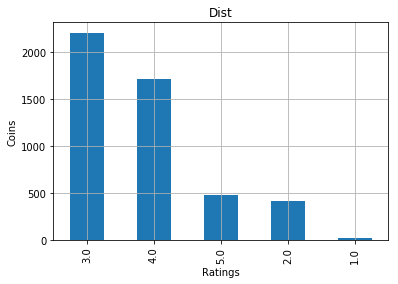

Number of data points: 2202 ( 45.647 %)
Number of data points: 1711 ( 35.468 %)
Number of data points: 476 ( 9.867 %)
Number of data points: 416 ( 8.624 %)
Number of data points: 19 ( 0.394 %)


In [292]:
#Categorize the rating feature 
bigdata['Rating'] = np.where(bigdata['Rating'] == '[]',0, bigdata['Rating'])
bigdata['Rating'] = bigdata.Rating.astype(np.float64)
bigdata.Rating = np.where(bigdata.Rating.isna(),0,bigdata.Rating)
bigdata['Rating'] = np.ceil(bigdata['Rating'])

# Distribution of Rating feature in the dataset
rating_distribution = bigdata1['Rating'].value_counts().sort_values(ascending =False)

rating_distribution.plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Coins')
plt.title('Dist')
plt.grid()
plt.show()
sorted_yi = np.argsort(-rating_distribution.values)
for i in sorted_yi:
    print('Number of data points:',rating_distribution.values[i], '(', np.round((rating_distribution.values[i]/bigdata.shape[0]*100), 3), '%)')


In [21]:
bigdata.head(5)

,CoinName,About,Country,wlkyc,Team Members,Category,Rating,Price,Softcap,Hardcap,Raised cap,Whitepaper Text
5722,Project Decorum,\nAbout Project Decorum\nProject Decorum aims ...,Netherlands,0,1,Platform,2.0,NaN,NaN,NaN,"$400,000",NaN
5723,Projectinitiators,\nAbout Projectinitiators\n“Everyone has talen...,Seychelles,1,0,"Cryptocurrency,Software",1.0,NaN,NaN,NaN,Unknown,NaN
5724,Useless Ethereum Token,\nAbout Useless Ethereum Token\nFirst of its k...,NaN,0,0,Cryptocurrency,1.0,0.0200 USD,NaN,NaN,"$80,520310.44500000 ETH",NaN
5725,APX,\nAbout APX\nAPX Ventures is a blockchain solu...,China,0,0,"Cryptocurrency,Business services",1.0,0.6000 USD,NaN,"1,500 BTC","$2,749,1851,500.00000000 BTC",NaN
5726,Bitcache,\nAbout Bitcache\nMegaUpload 2.0 is a privacy ...,Hong Kong,0,2,Platform,1.0,NaN,NaN,NaN,"$1,000,000",NaN


In [22]:
#Clean and convert Price features into Float value
price_list = []
for text in bigdata['Price']:
    if type(text) == str:
        if '=' in text:
            index = text.index('=')
            usd_price = text[index+2:]
            price_list.append(re.sub('[^0-9\.]', '',usd_price[:-4]))
        elif text[-3:] == 'USD':
            price_list.append(re.sub('[^0-9\.]', '',text[:-4]))
        else:
            price_list.append(None)
    else:
        price_list.append(None)
         
bigdata['Price'] = price_list
bigdata['Price'] = bigdata['Price'].astype(float)

In [23]:
#Impute About text to Whitepaper Text if Whitepaper text is None
bigdata.loc[bigdata['Whitepaper Text'].isnull(),'Whitepaper Text'] = bigdata['About']

In [24]:
#Create a copy of data
bigdata1 = bigdata

In [25]:
bigdata1.shape

(5626, 12)

<h3>Preprocessing of text data (About and Whitepaper)</h3>

In [26]:
# load stop words from nltk library
stop_words = set(stopwords.words('english'))

#Clean text data with regex
def nlp_preprocessing(text, index, column):
    if type(text) is str:
        string = ""
        text = text.strip()
        # replace every special char with space
        text = re.sub('[^a-zA-Z\'.-_$]', ' ', text)
        # replace multiple spaces with single space
        text = re.sub('\\s+',' ', text)
        
        for word in text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word.lower() in stop_words:
                string += word + " "
        bigdata1[column][index] = string

In [27]:
#Clean whitepaper text for each coin
for index, row in bigdata1.iterrows():
    if row['Whitepaper Text']:
        nlp_preprocessing(row['Whitepaper Text'], index, 'Whitepaper Text')
    else:
        print("there is no text description for id:",index)


In [28]:
#Clean whitepaper text for each coin
for index, row in bigdata1.iterrows():
    if type(row['About']) is str:
        nlp_preprocessing(row['About'], index, 'About')
    else:
        print("there is no text description for id:",index)

In [29]:
bigdata1.About[4]

"Tycoon first fully automatic social crypto trading platform real cryptocurrency. Tycoon serves secured interface professional traders end users. activities traders monitored via secured API connection real time copied follower's portfolio automatically. user manages investments preferred exchange able access portfolio time. investments never stored Tycoon.The followers freely assign part volume selected trader set individual stop loss. Selecting multiple traders allows diversifying investments optimize portfolio management.To ensure users safe experience platform developed highest security standards continuous assessment individual algorithms. "

In [30]:
bigdata1['Whitepaper Text'][4]

'W H E P P E R YC N C L C R P R N G . MADE SIMPLE. w w w . c n . Q7 24 68161 Mannheim Mail: info@tycoon.io 1. Introduction 2. Challenge 3. Solution Approach 4. Tycoon platform 4.1 User 4.1.1 Follower 4.1.2 Trader 4.1.3 Demo User 4.2 Follower benefits 4.2.1 Optimum support selection traders 4.2.2 Flexibility following 4.2.3 Stop loss feature 4.3 Trader benefits 4.3.1 Optimum support positioning Tycoon 4.3.2 Low administrative burden 4.3.3 Additional source income 4.4 Traders Ranking System 4.5 Connecting users 4.5.1 API key 4.5.2 Data privacy protection 4.6 Fees 4.6.1 Connection Fees 4.6.2 Profit Share 4.6.3 Payment process 4.7 Revenue model 4.8 UI UX 5. Tycoon Token TYC 5.1 Distribution 5.1.1 Sale Allocation 5.2 Token sale 5.2.1 Successful private sale participation 5.2.2 Successful crowdsale participation 5.3 TYC Value 5.4 TYC Vesting Plan 5.4.1 Private Sale 5.4.2 Crowdsale 5.4.3 Team und Advisors 5.4.4 Bounty/Airdrop 5.5 Funds Usage 6. Team Advisor 7. Roadmap 8. Risks 9. V E R V E W 

In [275]:
print(bigdata1.isnull().sum())
bigdata1.dropna(inplace=True)
bigdata1.isnull().sum()
print(bigdata1.shape)
print(len(bigdata1['Whitepaper Text'].values))


CoinName           0
About              0
Country            0
wlkyc              0
Team Members       0
Category           0
Rating             0
Price              0
Whitepaper Text    0
cluster            0
dtype: int64
(4824, 10)
4824


<h3> Test, Train and Cross Validation Split</h3>

<h4>Splitting data into train, test and cross validation (64:20:16)</h4>

In [312]:
y_true = bigdata1['Rating'].values

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X, X_test, y, y_test = train_test_split(bigdata1, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(train, y, stratify=y, test_size=0.2)


In [313]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 3087
Number of data points in test data: 965
Number of data points in cross validation data: 772


<h4>Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

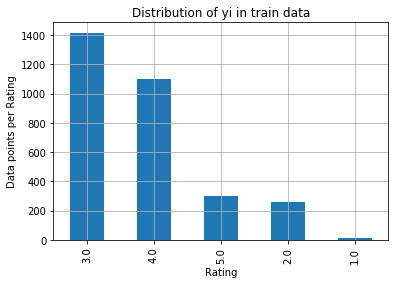

Number of data points in each Rating : 1416 ( 45.87 %)
Number of data points in each Rating : 1101 ( 35.666 %)
Number of data points in each Rating : 300 ( 9.718 %)
Number of data points in each Rating : 258 ( 8.358 %)
Number of data points in each Rating : 12 ( 0.389 %)


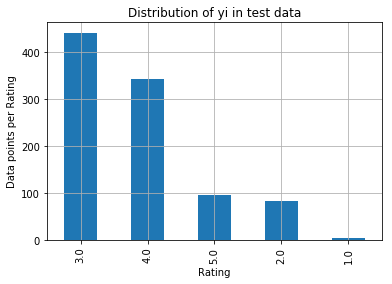

Number of data points in each Rating : 441 ( 45.699 %)
Number of data points in each Rating : 342 ( 35.44 %)
Number of data points in each Rating : 95 ( 9.845 %)
Number of data points in each Rating : 83 ( 8.601 %)
Number of data points in each Rating : 4 ( 0.415 %)


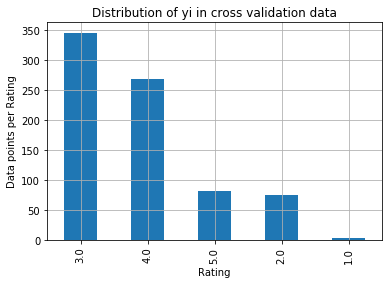

Number of data points in each Rating : 345 ( 44.689 %)
Number of data points in each Rating : 268 ( 34.715 %)
Number of data points in each Rating : 81 ( 10.492 %)
Number of data points in each Rating : 75 ( 9.715 %)
Number of data points in each Rating : 3 ( 0.389 %)


In [314]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_distribution = X_train['Rating'].value_counts()
test_distribution = X_test['Rating'].value_counts()
cv_distribution = X_cv['Rating'].value_counts()


train_distribution.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Data points per Rating')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_distribution.values)
for i in sorted_yi:
    print('Number of data points in each Rating', ':',train_distribution.values[i], '(', np.round((train_distribution.values[i]/X_train.shape[0]*100), 3), '%)')

    
test_distribution.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Data points per Rating')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_distribution.values)
for i in sorted_yi:
    print('Number of data points in each Rating', ':',test_distribution.values[i], '(', np.round((test_distribution.values[i]/X_test.shape[0]*100), 3), '%)')


cv_distribution.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Data points per Rating')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_distribution.values)
for i in sorted_yi:
    print('Number of data points in each Rating', ':',cv_distribution.values[i], '(', np.round((cv_distribution.values[i]/X_cv.shape[0]*100), 3), '%)')


<h2>Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the five class probabilites randomly such that they sum to 1. </p>

In [315]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    labels = [1,2,3,4,5]
    
    print( "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print( "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,5))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    

    print( "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,5))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 1.8386796570887167
Log loss on Test Data using Random Model 1.7822662133985419
              precision    recall  f1-score   support

           1       0.00      0.25      0.01         4
           2       0.11      0.27      0.15        83
           3       0.43      0.17      0.25       441
           4       0.37      0.19      0.25       342
           5       0.08      0.17      0.11        95

   micro avg       0.19      0.19      0.19       965
   macro avg       0.20      0.21      0.15       965
weighted avg       0.34      0.19      0.23       965

Confusion matrix --------------------


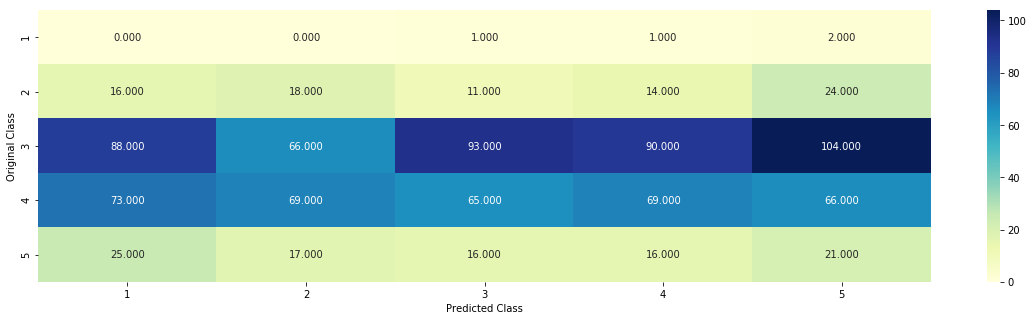

Precision matrix (Columm Sum=1) --------------------


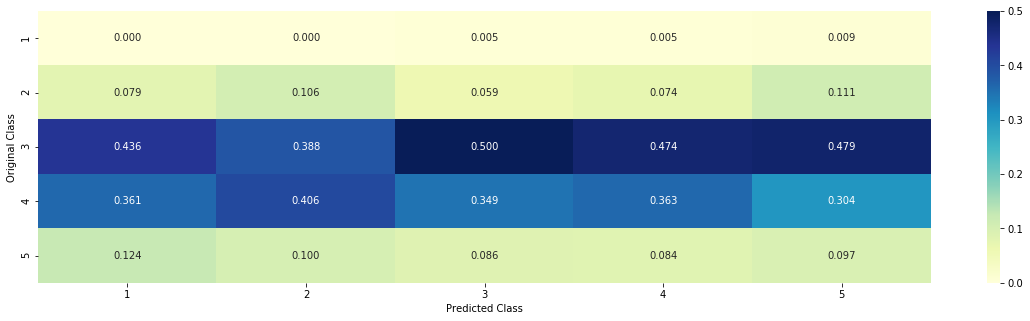

Recall matrix (Row sum=1) --------------------


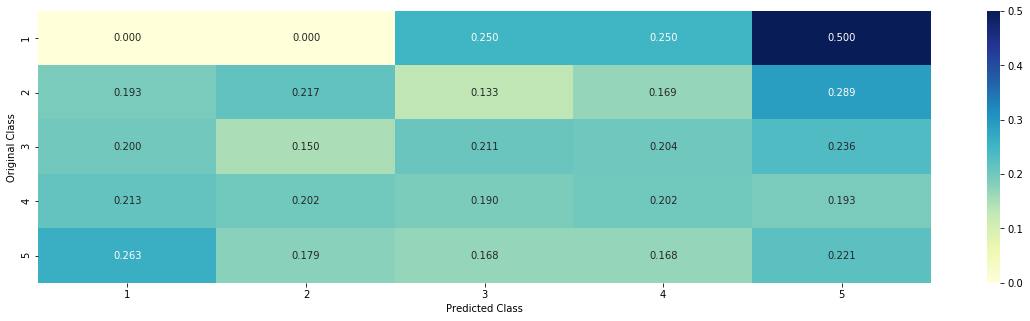

In [316]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
from sklearn.metrics import classification_report
test_len = X_test.shape[0]
cv_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted = np.zeros((cv_len,5))
for i in range(cv_len):
    rand_probs = np.random.rand(1,5)
    cv_predicted[i] = ((rand_probs/sum(rand_probs[0])))
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted = np.zeros((test_len,5))
for i in range(test_len):
    rand_probs = np.random.rand(1,5)
    test_predicted[i] = ((rand_probs/sum(rand_probs[0])))
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted, eps=1e-15))
print(classification_report\
          (y_test, predicted_y+1, labels=[1,2,3,4,5]))
predicted_y =np.argmax(test_predicted, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)


<h1>4. Machine Learning Models</h1>

<h3> Logistic Regression</h3>

In [317]:
def get_dict(alpha, feature, df):
    value_count = X_train[feature].value_counts()
    dictionary = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(1,6):
            cnt = X_train.loc[(X_train['Rating']==k) & (X_train[feature]==i)]
            vec.append((cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))
        dictionary[i]=vec
    return dictionary


def get_features(alpha, feature, df):
    dictionary = get_dict(alpha, feature, df)
    value_count = X_train[feature].value_counts()
    features = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            features.append(dictionary[row[feature]])
        else:
            features.append([1/5,1/5,1/5,1/5,1/5])
    return features

In [318]:
def extract_dictionary(text):
    dictionary = defaultdict(int)
    for index, row in text.iterrows():
        for word in row['Whitepaper Text'].split():
            dictionary[word] +=1
    return dictionary

In [319]:
text_vectorizer = TfidfVectorizer(max_features=1000,ngram_range=(1, 4))
train_text_feature_onehotCoding = text_vectorizer.fit_transform(X_train['Whitepaper Text'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1
text_dict = dict(zip(list(train_text_features),train_text_fea_counts))

In [320]:
print("total no of unique words in train data",len(train_text_features))

total no of unique words in train data 1000


In [321]:
dict_list=[]
for i in range(1,5):
    text= X_train[X_train['Rating']==i]
    dict_list.append(extract_dictionary(text))
    
    
class_list=[]
for i in range(1,5):
    class_list.append(X_train[X_train['Rating']==i].shape[0])

In [322]:
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(X_test['Whitepaper Text'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(X_cv['Whitepaper Text'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

<h4>Hyperparameter Tuning </h4>

For values of alpha =  1e-05 The log loss is: 1.195958286679973
For values of alpha =  0.0001 The log loss is: 1.1972339980967421
For values of alpha =  0.001 The log loss is: 1.2023704878347432
For values of alpha =  0.01 The log loss is: 1.1936349162297222
For values of alpha =  0.1 The log loss is: 1.1931096617690669
For values of alpha =  1 The log loss is: 1.193134665151484


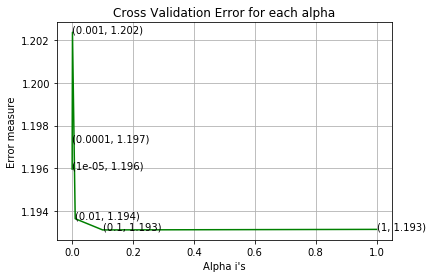

For values of best alpha =  0.1 The train log loss is: 1.1866523835626823
For values of best alpha =  0.1 The cross validation log loss is: 1.1931096617690669
For values of best alpha =  0.1 The test log loss is: 1.1861487140679383


In [323]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))




Log Loss : 1.1862372259992822
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        83
           3       0.46      0.99      0.63       441
           4       0.44      0.01      0.02       342
           5       0.00      0.00      0.00        95

   micro avg       0.46      0.46      0.46       965
   macro avg       0.18      0.20      0.13       965
weighted avg       0.37      0.46      0.29       965

Number of missclassified point : 0.5430051813471503
Confusion matrix --------------------


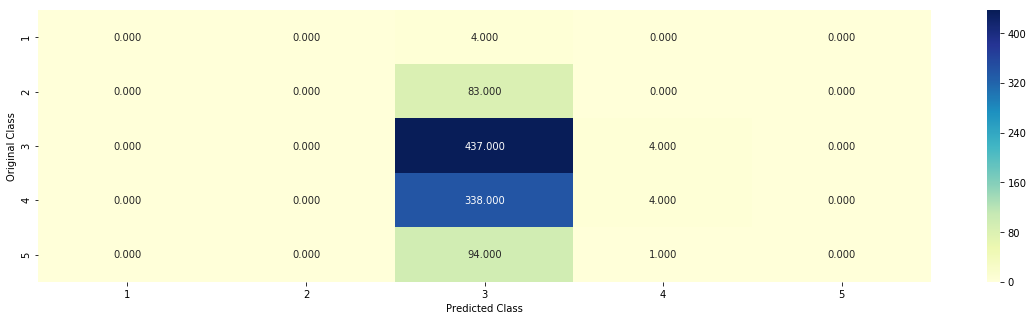

Precision matrix (Columm Sum=1) --------------------


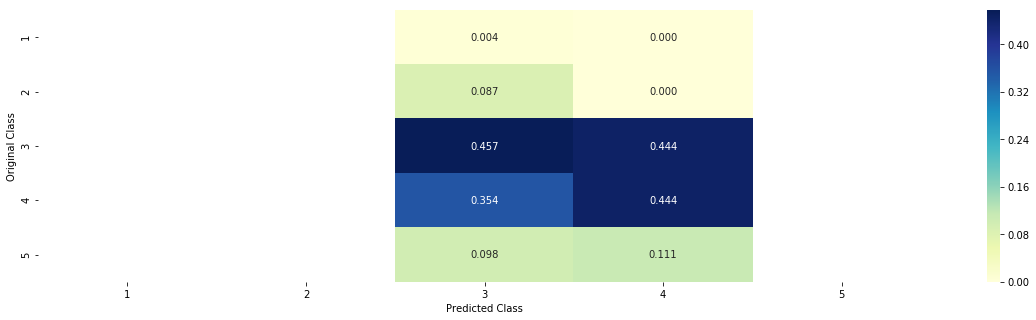

Recall matrix (Row sum=1) --------------------


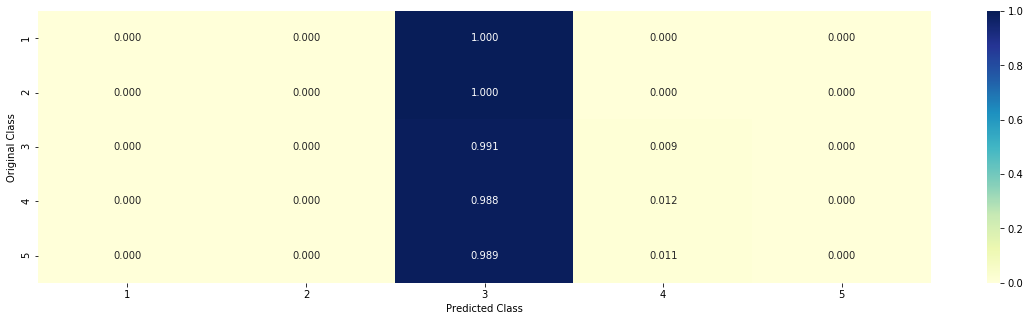

In [325]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf_probs = sig_clf.predict_proba(test_text_feature_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_test, sig_clf_probs))
print(classification_report\
          (y_test, sig_clf.predict(test_text_feature_onehotCoding), labels=[1,2,3,4,5]))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_text_feature_onehotCoding)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_test, sig_clf.predict(test_text_feature_onehotCoding))

In [141]:
def get_intersect(df):
    df_text_vec = TfidfVectorizer(max_features=1000,ngram_range=(1, 4))
    df_text_fea = df_text_vec.fit_transform(df['Whitepaper Text'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [128]:
len1,len2 = get_intersect(X_test)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersect(X_cv)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

87.7 % of word of test data appeared in train data
87.7 % of word of Cross Validation appeared in train data


<h3>Naive Bayes</h3>

for alpha = 1e-06
Log Loss : 1.1530103113117183
for alpha = 1e-05
Log Loss : 1.1531100063120183
for alpha = 0.0001
Log Loss : 1.153244035690666
for alpha = 0.001
Log Loss : 1.1534891468898212
for alpha = 0.01
Log Loss : 1.1540196585468683
for alpha = 0.1
Log Loss : 1.1559929239006035
for alpha = 1
Log Loss : 1.1691392673056589
for alpha = 10
Log Loss : 1.1801265708688047
for alpha = 100
Log Loss : 1.1822745588150787


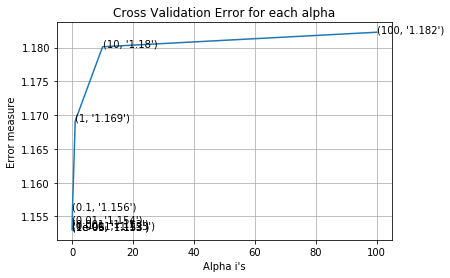

For values of best alpha =  1e-06 The train log loss is: 1.0779292182018398
For values of best alpha =  1e-06 The cross validation log loss is: 1.1530103113117183
For values of best alpha =  1e-06 The test log loss is: 1.1710128834964246


In [137]:
alpha = [10 ** x for x in range(-6, 3)]
cv_error = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_text_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_error.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_error)
for i, txt in enumerate(np.round(cv_error,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_error[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_error)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log Loss : 1.1872006914669262
Number of missclassified point : 0.5440414507772021
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        83
           3       0.46      1.00      0.63       441
           4       0.00      0.00      0.00       342
           5       0.00      0.00      0.00        95

   micro avg       0.46      0.46      0.46       965
   macro avg       0.09      0.20      0.13       965
weighted avg       0.21      0.46      0.29       965

Confusion matrix --------------------


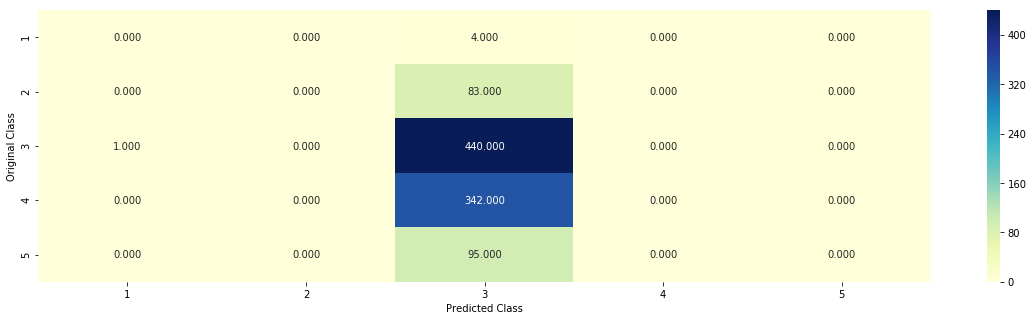

Precision matrix (Columm Sum=1) --------------------


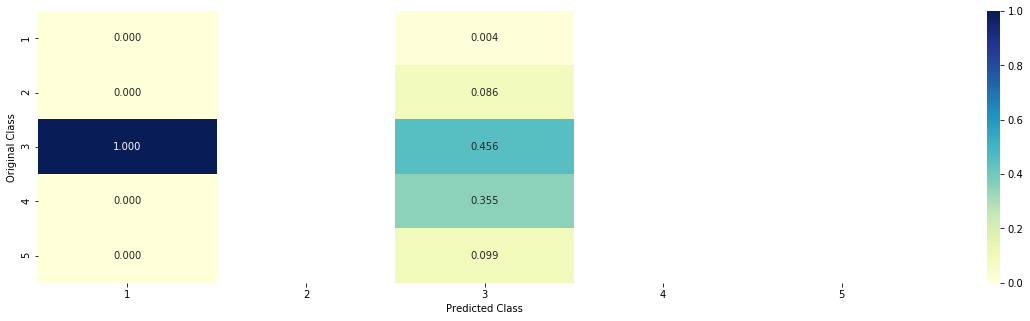

Recall matrix (Row sum=1) --------------------


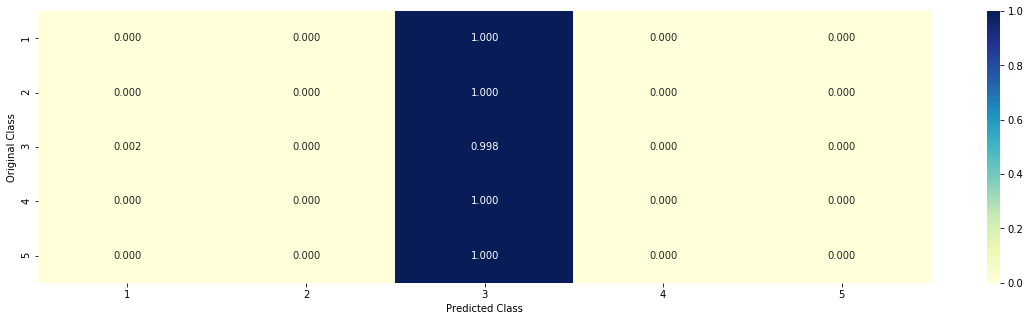

In [326]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf_probs = sig_clf.predict_proba(test_text_feature_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_test, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_text_feature_onehotCoding)- y_test))/y_test.shape[0])
print(classification_report\
          (y_test, sig_clf.predict(test_text_feature_onehotCoding), labels=[1,2,3,4,5]))
plot_confusion_matrix(y_test, sig_clf.predict(test_text_feature_onehotCoding))

<h2>Clustering</h2>

<h3>Tokenization</h3>

In [161]:

about_sentences=[ [token.strip(string.punctuation).strip() \
             for token in nltk.word_tokenize(doc.lower()) \
                 if token not in string.punctuation and \
                 len(token.strip(string.punctuation).strip())>=2]\
             for doc in bigdata1["About"]]
print(about_sentences[0:2])

[['buyanylight', 'bal', 'buyanylight', 'bal', 'innovative', 'platform', 'strives', 'decentralize', 'process', 'led', 'light', 'sourcing', 'reducing', 'role', 'intermediaries', 'offering', 'lighting', 'products', 'competitive', 'market', 'rates', 'platform', 'harnesses', 'power', 'blockchain', 'combined', 'artificial', 'intelligence', 'ai', 'big', 'data', 'enable', 'consumers', 'manufacturers', 'acquire', 'source', 'lighting', 'products', 'seamless', 'secure', 'cost', 'effective', 'way', 'currently', 'bal', 'platform', 'modules', 'deployed', 'centralized', 'architecture', 'however', 'bid', 'expand', 'scale', 'platform', 'global', 'scale', 'take', 'advantage', 'features', 'offered', 'blockchain', 'cryptography', 'bal', 'marketplace', 'decentralized', 'extended', 'per', 'roadmap', 'bal', 'platform', 'serve', 'replacement', 'centralized', 'commerce', 'marketplaces', 'lighting', 'products', 'capacity', 'expand', 'business', 'areas', 'e.g', 'construction', 'industry', 'pharma', 'industry', '

In [162]:
wp_sentences=[ [token.strip(string.punctuation).strip() \
             for token in nltk.word_tokenize(doc.lower()) \
                 if token not in string.punctuation and \
                 len(token.strip(string.punctuation).strip())>=2]\
             for doc in bigdata1["Whitepaper Text"]]
print(wp_sentences[0:2])

[['table', 'contents01', 'glossary02', 'token', 'sale', 'summary03', 'introduction', 'buyanylight04', 'buyanylight', 'works05', 'user', 'interface', 'preview06', 'standout', 'features07', 'us7.1inheriting', 'led', 'business', 'pioneers08', 'vision09', 'mission10', 'background11', 'problems', 'aim', 'solve1016101511171015111718121011171011161015111710161118181210111761823544131413iifor', 'buyersfiltered', 'quotations', 'adding', 'conveniencetrustless', 'payments', 'enable', 'risk', 'free', 'transactionsworld', 'class', 'logistics', 'enabled', 'blockchainreduced', 'shipping', 'costs', 'transparent', 'bidding', 'process', 'outsourcing', 'logisticswide', 'variety', 'productscompetitive', 'rates', 'save', '90', 'buying', 'better', 'quality', 'productseasy', 'price', 'comparisonworld', 'class', 'consultancy', 'fair', 'ratessellers', 'enjoy', 'benefi', 'ts', 'commerce', 'without', 'develop', 'front', 'end', 'storefree', 'registration', 'free', 'biddingsellers', 'offer', 'fl', 'exible', 'prici

<h3>Word2Vec</h3>

In [166]:
from gensim.models import word2vec
import logging

# print out tracking information
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)

# min_count: words with total frequency lower than this are ignored
# size: the dimension of word vector
# window: context window, i.e. the maximum distance 
#         between the current and predicted word 
#         within a sentence (i.e. the length of ngrams)
# workers: # of parallel threads in training
# for other parameters, check https://radimrehurek.com/gensim/models/word2vec.html
wv_model = word2vec.Word2Vec(wp_sentences, \
            min_count=5, size=300, \
            window=5, workers=4 )

2019-12-06 18:11:51,473 : INFO : collecting all words and their counts
2019-12-06 18:11:51,474 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-06 18:11:51,747 : INFO : collected 66987 word types from a corpus of 1747989 raw words and 4824 sentences
2019-12-06 18:11:51,748 : INFO : Loading a fresh vocabulary
2019-12-06 18:11:52,413 : INFO : effective_min_count=5 retains 17947 unique words (26% of original 66987, drops 49040)
2019-12-06 18:11:52,414 : INFO : effective_min_count=5 leaves 1673513 word corpus (95% of original 1747989, drops 74476)
2019-12-06 18:11:52,487 : INFO : deleting the raw counts dictionary of 66987 items
2019-12-06 18:11:52,489 : INFO : sample=0.001 downsamples 25 most-common words
2019-12-06 18:11:52,490 : INFO : downsampling leaves estimated 1635738 word corpus (97.7% of prior 1673513)
2019-12-06 18:11:52,567 : INFO : estimated required memory for 17947 words and 2000 dimensions: 296125500 bytes
2019-12-06 18:11:52,567 : INFO : r

<h3>spaCy
</h3>

In [167]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [168]:
#Extract only nouns from each whitepaper
spacey_noun_tokens = []
for sent in bigdata1['Whitepaper Text']:
    doc = nlp(f"{sent}")
    spacey_noun_tokens.append([np.text for np in doc if np.tag_ == 'NN'])

In [169]:
wv_model.train(spacey_noun_tokens, total_examples=len(spacey_noun_tokens),epochs=100)

2019-12-06 18:14:52,155 : WARNING : Effective 'alpha' higher than previous training cycles
2019-12-06 18:14:52,156 : INFO : training model with 4 workers on 17947 vocabulary and 2000 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2019-12-06 18:14:53,049 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:14:53,068 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:14:53,168 : INFO : EPOCH 1 - PROGRESS: at 95.07% examples, 188674 words/s, in_qsize 1, out_qsize 1
2019-12-06 18:14:53,169 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 18:14:53,188 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 18:14:53,189 : INFO : EPOCH - 1 : training on 222519 raw words (199324 effective words) took 1.0s, 193635 effective words/s
2019-12-06 18:14:54,142 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:14:54,161 : INFO : worker thread finished

2019-12-06 18:15:09,451 : INFO : EPOCH 14 - PROGRESS: at 73.82% examples, 143716 words/s, in_qsize 6, out_qsize 0
2019-12-06 18:15:09,467 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:15:09,531 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:15:09,604 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 18:15:09,622 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 18:15:09,623 : INFO : EPOCH - 14 : training on 222519 raw words (199408 effective words) took 1.2s, 162345 effective words/s
2019-12-06 18:15:10,810 : INFO : EPOCH 15 - PROGRESS: at 73.82% examples, 128394 words/s, in_qsize 6, out_qsize 0
2019-12-06 18:15:10,936 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:15:10,961 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:15:11,111 : INFO : worker thread finished; awaiting finish of 1 more threads

2019-12-06 18:15:24,338 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 18:15:24,339 : INFO : EPOCH - 27 : training on 222519 raw words (199476 effective words) took 1.1s, 174703 effective words/s
2019-12-06 18:15:25,273 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:15:25,321 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:15:25,347 : INFO : EPOCH 28 - PROGRESS: at 95.42% examples, 189923 words/s, in_qsize 1, out_qsize 1
2019-12-06 18:15:25,349 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 18:15:25,361 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 18:15:25,362 : INFO : EPOCH - 28 : training on 222519 raw words (199361 effective words) took 1.0s, 195982 effective words/s
2019-12-06 18:15:26,320 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:15:26,325 : INFO : worker thread finished; awaiting fi

2019-12-06 18:15:40,611 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:15:40,651 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 18:15:40,673 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 18:15:40,674 : INFO : EPOCH - 42 : training on 222519 raw words (199426 effective words) took 0.9s, 211799 effective words/s
2019-12-06 18:15:41,699 : INFO : EPOCH 43 - PROGRESS: at 73.82% examples, 149103 words/s, in_qsize 6, out_qsize 0
2019-12-06 18:15:41,746 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:15:41,806 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:15:41,862 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 18:15:41,880 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 18:15:41,881 : INFO : EPOCH - 43 : training on 222519 raw words (199447 effective words) took 1.2s, 16

2019-12-06 18:15:56,795 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 18:15:56,796 : INFO : EPOCH - 57 : training on 222519 raw words (199477 effective words) took 0.9s, 227229 effective words/s
2019-12-06 18:15:57,562 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:15:57,599 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:15:57,663 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 18:15:57,678 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 18:15:57,679 : INFO : EPOCH - 58 : training on 222519 raw words (199399 effective words) took 0.9s, 228180 effective words/s
2019-12-06 18:15:58,448 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:15:58,485 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:15:58,547 : INFO : worker thread finished; awaiting finish of 1 more threads


2019-12-06 18:16:11,751 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:16:11,786 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:16:11,851 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 18:16:11,865 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 18:16:11,867 : INFO : EPOCH - 74 : training on 222519 raw words (199388 effective words) took 0.9s, 227917 effective words/s
2019-12-06 18:16:12,667 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:16:12,706 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:16:12,720 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 18:16:12,746 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 18:16:12,747 : INFO : EPOCH - 75 : training on 222519 raw words (199370 effective words) took 0.9s, 227706 effective words/s


2019-12-06 18:16:26,206 : INFO : EPOCH - 89 : training on 222519 raw words (199519 effective words) took 0.9s, 223968 effective words/s
2019-12-06 18:16:27,027 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:16:27,029 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:16:27,085 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 18:16:27,116 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 18:16:27,117 : INFO : EPOCH - 90 : training on 222519 raw words (199455 effective words) took 0.9s, 220366 effective words/s
2019-12-06 18:16:27,950 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 18:16:27,986 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 18:16:27,990 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 18:16:28,032 : INFO : worker thread finished; awaiting finish of 0 more threads


(19945558, 22251900)

In [328]:
X = wv_model[wv_model.wv.vocab]
X.shape #20,174 unique words with vector dim of 1 x 400

(17947, 2000)

<h3>K-means clustering</h3>

In [38]:
from nltk.cluster import KMeansClusterer, \
cosine_distance
from sklearn import cluster

clusters_number = 15
kclusterer = KMeansClusterer(clusters_number,  distance=nltk.cluster.util.cosine_distance, repeats=50, avoid_empty_clusters=True)

assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

print(assigned_clusters)

[9, 8, 8, 9, 14, 13, 12, 10, 12, 12, 7, 8, 5, 13, 0, 14, 12, 12, 13, 2, 0, 13, 8, 0, 6, 13, 0, 14, 3, 5, 14, 0, 8, 10, 14, 14, 7, 12, 0, 10, 11, 0, 4, 5, 7, 0, 7, 2, 13, 2, 4, 13, 12, 10, 0, 14, 2, 2, 7, 6, 6, 5, 13, 6, 7, 6, 4, 0, 1, 0, 0, 0, 8, 13, 13, 0, 0, 13, 3, 10, 13, 12, 5, 0, 0, 6, 11, 9, 12, 10, 4, 13, 12, 3, 9, 1, 14, 0, 6, 6, 12, 5, 5, 13, 13, 5, 13, 13, 0, 10, 3, 3, 1, 7, 7, 12, 12, 12, 5, 5, 3, 1, 0, 0, 1, 13, 13, 14, 1, 14, 0, 6, 2, 4, 13, 12, 12, 0, 1, 14, 11, 6, 11, 3, 4, 11, 9, 14, 10, 10, 13, 8, 10, 10, 10, 9, 9, 8, 13, 13, 13, 14, 14, 8, 13, 2, 7, 13, 13, 12, 1, 6, 6, 7, 2, 12, 13, 13, 13, 13, 12, 12, 11, 1, 13, 1, 1, 2, 13, 1, 7, 6, 9, 6, 2, 6, 9, 2, 2, 6, 7, 3, 7, 3, 12, 3, 3, 3, 0, 3, 4, 12, 5, 1, 13, 8, 7, 13, 8, 1, 5, 5, 10, 1, 0, 9, 13, 11, 1, 14, 13, 1, 10, 5, 10, 12, 10, 1, 10, 2, 6, 12, 14, 14, 4, 8, 1, 7, 0, 2, 0, 4, 6, 4, 6, 14, 11, 6, 6, 11, 14, 14, 4, 4, 0, 0, 1, 6, 7, 2, 12, 7, 0, 3, 8, 1, 3, 1, 8, 7, 1, 1, 5, 7, 13, 1, 12, 14, 9, 10, 11, 14, 10, 0, 10

In [148]:
from sklearn import metrics
import numpy as np

# set the min document frequency to 5
# generate tfidf matrix
tfidf_vect = TfidfVectorizer(stop_words="english",\
                             min_df=50) 

dtm= tfidf_vect.fit_transform(train["Whitepaper Text"])
print (dtm.shape)
# clusterer.means() contains the centroids
# each row is a cluster, and 
# each column is a feature (word)
centroids=np.array(kclusterer.means())

# argsort sort the matrix in ascending order 
# and return locations of features before sorting
# [:,::-1] reverse the order
sorted_centroids = centroids.argsort()[:, ::-1] 

# The mapping between feature (word)
# index and feature (word) can be obtained by
# the vectorizer's function get_feature_names()
voc_lookup= tfidf_vect.get_feature_names()

for i in range(clusters_number):
    
    # get words with top 20 tf-idf weight in the centroid
    top_words=[voc_lookup[word_index] \
               for word_index in sorted_centroids[i, :15]]
    print("Cluster %d:\n %s " % (i, "; ".join(top_words)))

(3859, 2714)
Cluster 0:
 33; 100; acquisition; 24; applies; actively; builds; accurate; 2014; absolutely; best; addresses; 35; 65; affordable 
Cluster 1:
 arise; 15; best; ar; 33; absolute; 100; based; action; attempts; assets; bring; beginning; biggest; advertisements 
Cluster 2:
 agent; able; absolutely; biggest; brands; available; accelerate; 32; approval; area; beginning; 04; advertising; attempts; 06 
Cluster 3:
 assessment; absolutely; answer; advertising; area; april; airdrop; 08; b2c; automate; backed; 100; actions; biggest; beginning 
Cluster 4:
 builds; attract; attacks; attempts; advisor; buyer; achievements; 32; best; agent; based; aiming; 2013; absolute; aims 
Cluster 5:
 absolutely; 95; backed; believes; assessment; appropriate; buying; 33; advisor; according; advertising; adds; availability; calculation; applicable 
Cluster 6:
 absolutely; april; 100; biggest; buyer; attempts; brands; buy; available; 2021; area; accelerate; best; agent; affected 
Cluster 7:
 absolutely; 

Cluster id labels for inputted data
[1 1 1 ... 1 1 1]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-548120.5
Silhouette_score: 0.48116421699523926 for clusters:2
0.48116422
Cluster id labels for inputted data
[0 0 2 ... 0 0 0]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-539812.3
Silhouette_score: 0.41373178362846375 for clusters:3
0.41373178
Cluster id labels for inputted data
[2 2 2 ... 0 0 0]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-532528.8
Silhouette_score: 0.4342364966869354 for clusters:4
0.4342365
Cluster id labels for inputted data
[3 0 0 ... 3 3 3]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-527175.7
Silhouette_score: 0.42535552382469

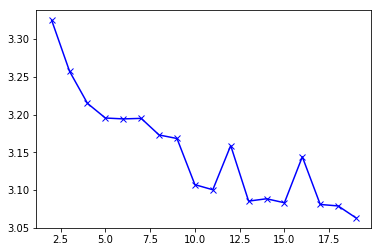

In [172]:
from sklearn import cluster
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
distortions = []
range_cluster = list(range(2,20))
for n in range_cluster:
    
    kmeans = cluster.KMeans(n_clusters=n)
    kmeans.fit_predict(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    print ("Cluster id labels for inputted data")
    print (labels)
#     print ("Centroids data")
#     print (centroids)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, "euclidean"), axis = 1))/ X.shape[0])
    print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
    print (kmeans.score(X))

    silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

    print (f"Silhouette_score: {silhouette_score} for clusters:{n}")
    print (silhouette_score)
plt.plot(range_cluster, distortions, "bx-")
plt.show()

In [180]:
kmeans = cluster.KMeans(n_clusters=8)
kmeans.fit_predict(X)

labels14 = kmeans.labels_
centroids = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)
print ("Cluster id labels for inputted data")
print (labels14)
#     print ("Centroids data")
#     print (centroids)
distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, "euclidean"), axis = 1))/ X.shape[0])
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

silhouette_score = metrics.silhouette_score(X, labels14, metric='euclidean')

print (f"Silhouette_score: {silhouette_score} for clusters: 8")
print (silhouette_score)

Cluster id labels for inputted data
[3 4 4 ... 0 0 0]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-516184.53
Silhouette_score: 0.41446542739868164 for clusters: 8
0.41446543


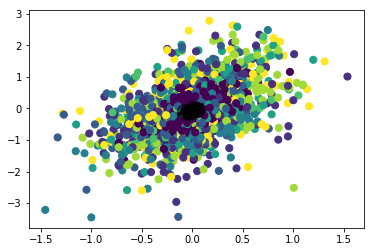

In [181]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [182]:
import numpy
vectorized_train_data = numpy.array([\
                 (numpy.mean([wv_model.wv[w] for w in doc if w in wv_model.wv.vocab]\
                             or [np.zeros(X.shape[1])],axis=0))\
                for doc in spacey_noun_tokens
                ])
print(vectorized_train_data.shape)

(4824, 2000)


In [185]:
#Clusters using mean of word vectors for each whitepaper
kmeans = cluster.KMeans(n_clusters=8)
kmeans.fit_predict(vectorized_train_data)

labels14 = kmeans.labels_
centroids = kmeans.cluster_centers_
y_kmeans = kmeans.predict(vectorized_train_data)
print ("Cluster id labels for inputted data")
print (labels14)
#     print ("Centroids data")
#     print (centroids)
distortions.append(sum(np.min(cdist(vectorized_train_data, kmeans.cluster_centers_, "euclidean"), axis = 1))/ vectorized_train_data.shape[0])
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(vectorized_train_data))

silhouette_score = metrics.silhouette_score(vectorized_train_data, labels14, metric='euclidean')

print (f"Silhouette_score: {silhouette_score} for clusters: 8")
print (silhouette_score)

Cluster id labels for inputted data
[2 5 0 ... 4 0 2]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-92840.03380645026
Silhouette_score: 0.03685016418492115 for clusters: 8
0.03685016418492115


In [186]:
bigdata1["cluster"] = labels14
print(len(labels14))
print(bigdata1.shape)

4824
(4824, 10)


In [187]:
bigdata1.groupby(['cluster', 'Rating']).size().unstack(fill_value=0)

Rating,1.0,2.0,3.0,4.0,5.0
cluster,,,,,
0,2,75,281,187,44
1,1,27,175,165,55
2,3,56,421,334,110
3,6,83,319,230,52
4,1,22,129,64,16
5,2,45,298,268,82
6,1,37,191,155,50
7,3,71,388,308,67


In [189]:
bigdata1

,CoinName,About,Country,wlkyc,Team Members,Category,Rating,Price,Whitepaper Text,cluster
0,BuyAnyLight (BAL) (PreICO),BuyAnyLight BAL BuyAnyLight BAL innovative pla...,United Arab Emirates,1,25,"Electronics,Big Data,Artificial Intelligence,E...",5.0,0.303300,TABLE CONTENTS01 GLOSSARY02 TOKEN SALE SUMMARY...,2
1,DACX,DACX Digital Asset Commodity Exchange leverage...,UK,1,11,"Real estate,Platform,Investment,Cryptocurrency...",5.0,0.200000,Digital Asset Commodity ExchangeWhitepaper Ver...,5
2,Max Crowdfund,Max Crowdfund Max Property Group MPG consists ...,Netherlands,1,27,"Business services,Investment,Platform,Real estate",5.0,0.010000,11Future DevelopmentRoadmapQ1 2016Blockchain t...,0
3,Mindsync,Mindsync MindSync AI Service Expert aService p...,UK,1,15,"Artificial Intelligence,Big Data,Business serv...",5.0,0.140000,Mindsync MindSync AI Service Expert aService p...,2
4,Tycoon,Tycoon first fully automatic social crypto tra...,Germany,1,14,Platform,5.0,0.100000,W H E P P E R YC N C L C R P R N G . MADE SIMP...,6
5,BitWings,BitWings WINGS MOBILE mobile network operator ...,Malta,1,29,"Electronics,Software",5.0,0.200000,bitwings.org597. ICO DETAILSIn total issuance ...,7
6,Freelanex,Freelanex Freelanex decentralized platformwhic...,United Arab Emirates,1,16,"Cryptocurrency,Platform,Smart Contract",5.0,0.004000,Clients Clients automatically plugged token ad...,7
7,Global Crypto Alliance,Global Crypto Alliance GCA organization experi...,Malta,0,10,Cryptocurrency,5.0,0.020000,Are: Global Crypto AllianceWe Global Crypto Al...,2
8,GRAYLL,GRAYLL GRAYLL applies DLT AI ML algorithmic fi...,UK,1,10,"Cryptocurrency,Big Data,Artificial Intelligenc...",5.0,0.010000,INTRODUCTIONGRAYLL simple use everyone like ma...,0
9,P2P solutions foundation,P2P solutions foundation Anything exchange dig...,Mauritius,1,14,"Infrastructure,Communication,Platform",5.0,0.030000,P2P solutions foundation Anything exchange dig...,2


<h3>DBSCAN
</h3>

In [191]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 


X_normalized = normalize(X)
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 




         P1        P2
0  0.396814  0.197923
1  0.554270  0.329098
2  0.479022  0.393687
3  0.420679  0.276844
4  0.677126  0.146056


In [334]:

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.025, min_samples = 10).fit(X_principal) 
labels = db_default.labels_ 
labe = pd.DataFrame(labels)
labe[0].value_counts()

 0    17377
-1      505
 2       21
 1       15
 4       14
 3       12
 5        3
Name: 0, dtype: int64

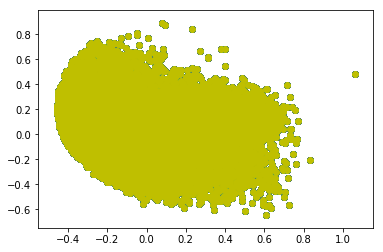

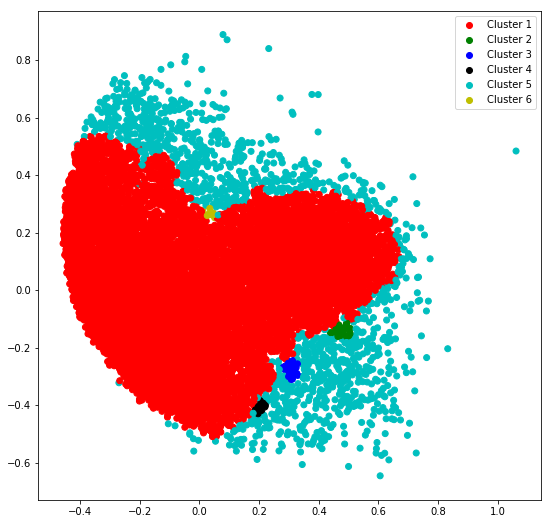

In [217]:

# Building the label to colour mapping 
colours = {}
colours[-1] = 'c'
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'k'
colours[4] = 'y'


  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
c = plt.scatter(X_principal['P1'], X_principal['P2'], color ='c'); 
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 

  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b,k,c,y), ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6')) 
  
plt.show() 


In [288]:
#Preprocessing - Create Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# LDA can only use raw term counts for LDA 
tf_vectorizer = CountVectorizer(max_df=0.9, \
                min_df=5, stop_words=stopwords.words('english'))
tf = tf_vectorizer.fit_transform(list(bigdata1['Whitepaper Text'].values))

# each feature is a word (bag of words)
# get_feature_names() gives all words
tf_feature_names = tf_vectorizer.get_feature_names()

print(tf_feature_names[0:20])
print(tf.shape)


['00', '000', '0000', '00001', '0001', '0002', '0005', '001', '002', '003', '004', '005', '006', '007', '008', '009', '01', '010', '012', '015']
(4824, 12236)


In [289]:
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 10

# Run LDA. For details, check
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation.perplexity

# max_iter control the number of iterations 
# evaluate_every determines how often the perplexity is calculated
# n_jobs is the number of parallel threads
lda = LatentDirichletAllocation(n_components=num_topics, \
                                max_iter=20,verbose=1,
                                evaluate_every=5, n_jobs=1,
                                random_state=0).fit(tf)

iteration: 1 of max_iter: 30
iteration: 2 of max_iter: 30
iteration: 3 of max_iter: 30
iteration: 4 of max_iter: 30
iteration: 5 of max_iter: 30, perplexity: 2681.9286
iteration: 6 of max_iter: 30
iteration: 7 of max_iter: 30
iteration: 8 of max_iter: 30
iteration: 9 of max_iter: 30
iteration: 10 of max_iter: 30, perplexity: 2594.8858
iteration: 11 of max_iter: 30
iteration: 12 of max_iter: 30
iteration: 13 of max_iter: 30
iteration: 14 of max_iter: 30
iteration: 15 of max_iter: 30, perplexity: 2563.6113
iteration: 16 of max_iter: 30
iteration: 17 of max_iter: 30
iteration: 18 of max_iter: 30
iteration: 19 of max_iter: 30
iteration: 20 of max_iter: 30, perplexity: 2547.6367
iteration: 21 of max_iter: 30
iteration: 22 of max_iter: 30
iteration: 23 of max_iter: 30
iteration: 24 of max_iter: 30
iteration: 25 of max_iter: 30, perplexity: 2538.5957
iteration: 26 of max_iter: 30
iteration: 27 of max_iter: 30
iteration: 28 of max_iter: 30
iteration: 29 of max_iter: 30
iteration: 30 of max_ite

In [290]:
num_top_words=30

# lda.components_ returns a KxN matrix
# for word distribution in each topic.
# Each row consists of \
# probability (counts) of each word in the feature space

for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(tf_feature_names[i],topic[i]) \
           for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('content', 1713.3840943825257), ('data', 1024.0168298616115), ('health', 1000.1722293943235), ('advertising', 890.4742990733625), ('de', 847.5543550593353), ('medical', 785.1091579599939), ('healthcare', 538.0125795263375), ('information', 470.2303732405761), ('advertisers', 434.1139042195775), ('ad', 429.43170369930033), ('media', 408.6160073342185), ('platform', 391.6393670159383), ('patients', 370.0999659559052), ('patient', 355.0999257400244), ('care', 350.02332018237456), ('users', 339.4372191772255), ('insurance', 333.36457757529087), ('creators', 326.9545668204738), ('social', 320.2045531966052), ('la', 310.15410085036336), ('en', 287.3638765933714), ('research', 277.4326230095941), ('publishers', 268.8254655523262), ('digital', 250.89298961010263), ('services', 236.30904689813428), ('ads', 224.45181228567398), ('access', 223.4970392865519), ('video', 222.05412946302263), ('also', 216.59239656025105), ('networks', 209.95094807112295)]


Topic 1:
[('token', 4811.403037

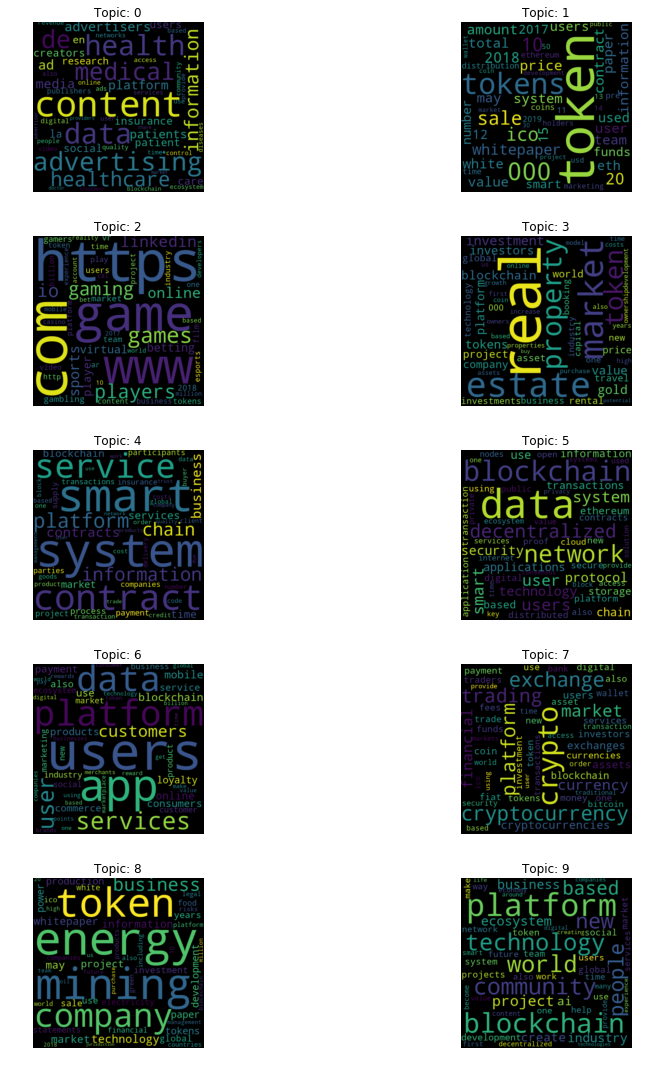

In [307]:
from wordcloud import WordCloud

num_top_words=50
f, axarr = plt.subplots(5, 2, figsize=(15, 15));

for topic_idx, topic in enumerate(lda.components_):
    # create a dataframe with two columns (word, weight) for each topic
    
    # create a word:count dictionary
    f={tf_feature_names[i]:topic[i] for i in topic.argsort()[::-1][0:num_top_words]}
    
    # generate wordcloud in subplots
    wordcloud = WordCloud(width=500, height=500, margin=0, background_color="black");
    _ = wordcloud.generate_from_frequencies(frequencies=f);
    
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].imshow(wordcloud, interpolation="bilinear");
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].set_title("Topic: "+str(topic_idx));
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].axis('off')

plt.tight_layout()
plt.show()

In [259]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk,string
import numpy as np
import re

data = pd.read_excel("/home/ankit/Desktop/Stevens/Semester 3/BIA-660/Project/icobench data/wpcoins.xlsx")

data



,name,rating,about,whitepaper
0,GFC,2.9,About GFC\nThe design of GFC’s concept is the ...,e-auctioning the olive oil & fruit and vegetab...
1,Granite,2.9,About Granite\nCommercial and educational orga...,granite white paper [en].pdf - google drive\n\...
2,HAB,2.9,About HAB\nThe never-ending global innovation ...,white paper v1.0\n\nsmarthab sas\naugust 2018\...
3,Hyperion,2.9,"About Hyperion\nIn several dimensions, the cur...",meet google drive – one place for all your fil...
4,Kauri,2.9,About Kauri\nThe project Kauri is supposed to ...,kauri whitepaper\n\n\n\n1. introduction..........
5,Kingcuan,2.9,About Kingcuan\nWe can say that Kingcuan is a ...,whitepaper kingcuan.pdf - google drive\n\nsign in
6,Lisk,2.9,About Lisk\nLisk is a next generation platform...,lisk-whitepaper/liskwhitepaper.md at developme...
7,Metronome,3.7,About Metronome\nMetronome builds off the less...,this site requires javascript and cookies to b...
8,MYbDAIRY Smart Farms,2.9,"About MYbDAIRY Smart Farms\nBlockchain, the te...",artificial intelligence and blockchain \nbased...
9,Nexinter (IEO),2.9,About Nexinter (IEO)\nIn the current financial...,nexinter_whitepaper_interactive\n\n\nnixt – ne...


In [260]:
data.loc[data['rating'] > 3, 'risk'] = 0
data.loc[data['rating'] <= 3, 'risk'] = 1
#drop rows with nan values
data=data.dropna()
data.shape

(1182, 5)

In [261]:
# set the maximum number of words to be used
MAX_NB_WORDS=10000

# set sentence/document length as most documents had white paper length between 3000 and 4000
MAX_DOC_LEN=4000

# get a Keras tokenizer and 
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=False)

#fit the tokenizer to the data
tokenizer.fit_on_texts(data["whitepaper"])

# convert each document to a list of word index as a sequen
sequences = tokenizer.\
texts_to_sequences(data["whitepaper"])

# pad all sequences into the same length 
# if a sentence is longer than maxlen, pad it in the right
# if a sentence is shorter than maxlen, truncate it in the right
padded_sequences = pad_sequences(sequences, \
                                 maxlen=MAX_DOC_LEN, \
                                 padding='post', \
                                 truncating='post')

print(padded_sequences[0])

[  33    1 1416 ...    0    0    0]


In [262]:
# Split data for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(\
                        padded_sequences, data['rating'],\
                        test_size=0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(945, 4000)
(945,)
(237, 4000)
(237,)


In [263]:

from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model

EMBEDDING_DIM=150

# 1 dimension array with integers
main_input = Input(shape=(MAX_DOC_LEN,), \
                   dtype='int32', name='main_input')

embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                    output_dim=EMBEDDING_DIM, \
                    input_length=MAX_DOC_LEN,\
                    name='embedding')(main_input)


conv1d_1= Conv1D(filters=64, kernel_size=1, \
                 name='conv_unigram',\
                 activation='relu')(embed_1)

pool_1 = MaxPooling1D(MAX_DOC_LEN-1+1, \
                      name='pool_unigram')(conv1d_1)

flat_1 = Flatten(name='flat_unigram')(pool_1)

conv1d_2= Conv1D(filters=64, kernel_size=2, \
                 name='conv_bigram',\
                 activation='relu')(embed_1)
pool_2 = MaxPooling1D(MAX_DOC_LEN-2+1, name='pool_bigram')(conv1d_2)
flat_2 = Flatten(name='flat_bigram')(pool_2)

z=Concatenate(name='concate')([flat_1, flat_2])

drop_1=Dropout(rate=0.5, name='dropout')(z)

dense_1 = Dense(192, activation='relu', name='dense')(drop_1)

preds = Dense(1, activation='sigmoid', name='output')(dense_1)

model = Model(inputs=main_input, outputs=preds)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 4000)         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 4000, 150)    1500150     main_input[0][0]                 
__________________________________________________________________________________________________
conv_unigram (Conv1D)           (None, 4000, 64)     9664        embedding[0][0]                  
__________________________________________________________________________________________________
conv_bigram (Conv1D)            (None, 3999, 64)     19264       embedding[0][0]                  
____________________________________________________________________________________________

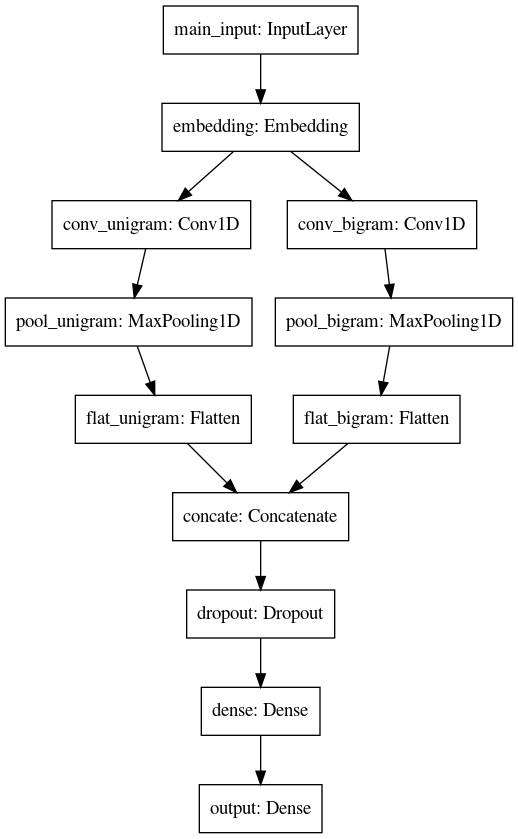

In [264]:
model.summary()
model.get_config()
model.get_weights()
from keras.utils import plot_model
plot_model(model, to_file='cnn_model.png')

In [265]:
# Exercise 5.4: Compile the model

model.compile(loss="binary_crossentropy", \
              optimizer="adam", \
              metrics=["accuracy"])

In [266]:
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint

BATCH_SIZE = 64
NUM_EPOCHES = 20

BEST_MODEL_FILEPATH="best_model"
earlyStopping=EarlyStopping(monitor='val_loss', patience=2, verbose=2, mode='min')
checkpoint = ModelCheckpoint(BEST_MODEL_FILEPATH, monitor='val_loss', \
                             verbose=2, save_best_only=True, mode='min')
    
training=model.fit(X_train, y_train, \
          batch_size=BATCH_SIZE, epochs=NUM_EPOCHES, \
          callbacks=[earlyStopping, checkpoint],\
          validation_data=[X_test, y_test], verbose=2)


Train on 945 samples, validate on 237 samples
Epoch 1/20
 - 47s - loss: -2.8345e+00 - accuracy: 0.0000e+00 - val_loss: -9.2682e+00 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to -9.26816, saving model to best_model
Epoch 2/20


KeyboardInterrupt: 

In [ ]:
# Exercise 5.6. Investigate the training process

import matplotlib.pyplot as plt
import pandas as pd
# plot a figure with size 20x8

# the fitting history is saved as dictionary
# covert the dictionary to dataframe
df=pd.DataFrame.from_dict(training.history)
df.columns=["val_loss","val_acc", \
             "train_loss", "train_acc"]
df.index.name='epoch'
print(df)

# plot training history
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3));

df[["val_loss","train_loss" ]].plot(ax=axes[0]);
df[["val_acc","train_acc" ]].plot(ax=axes[1]);
plt.show();